In [2]:
import pandas as pd
import numpy as np
import geopandas as gp
from pathlib import Path
import matplotlib.pyplot as plt

For this project we will use shapefiles downloaded from https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london. These contain London statistical boundaries at different levels of aggregation. Let's have a look at them.

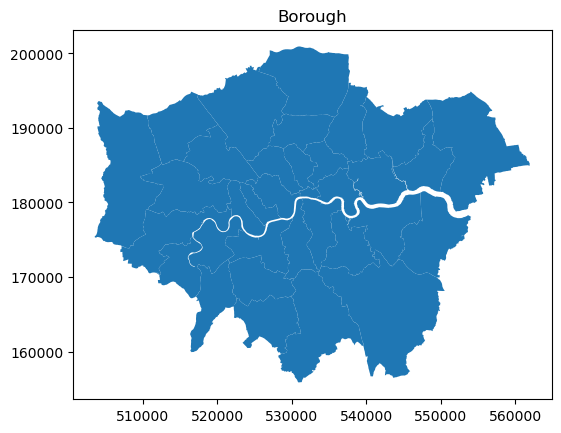

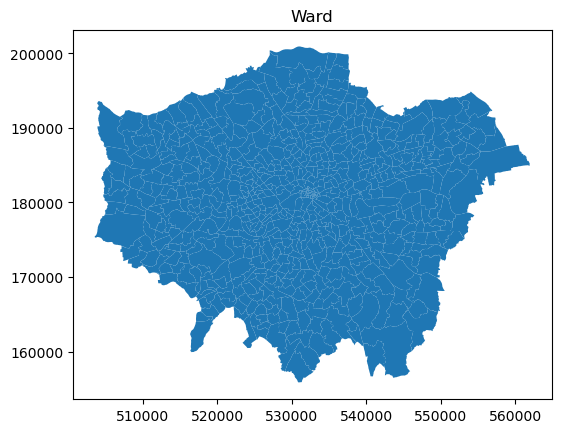

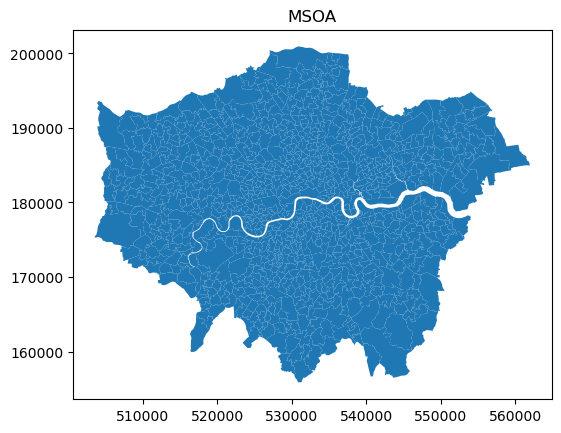

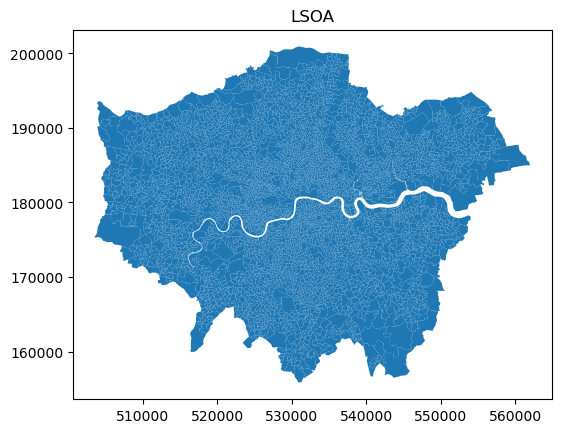

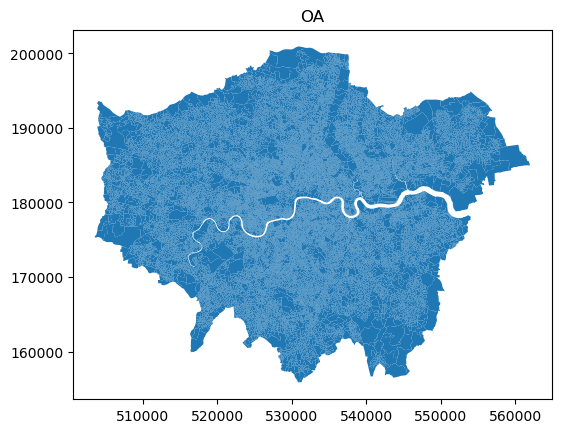

In [4]:
data_path = Path.cwd().joinpath('data','raw', 'statistical-gis-boundaries-london', 'ESRI')
shapefiles = ['London_Borough_Excluding_MHW', 'London_Ward', 'MSOA_2011_London_gen_MHW', 'LSOA_2011_London_gen_MHW', 'OA_2011_London_gen_MHW']
names = ['Borough', 'Ward', 'MSOA', 'LSOA', 'OA']
gdfs = {}

for shapefile, name in zip(shapefiles, names):
    shp_path = data_path.joinpath(shapefile).with_suffix('.shp')
    gdf = gp.read_file(shp_path)
    gdf.plot()
    plt.title(name)

    gdfs.update({name: gdf})

There is some additional data stored in the shapefiles - let's examine what is available:

In [32]:
from pandas.api.types import is_numeric_dtype

for name in names:
    print(f'{name}:', [col for col in gdfs[name].columns if is_numeric_dtype(gdfs[name][col])])

Borough: ['HECTARES', 'NONLD_AREA']
Ward: ['HECTARES', 'NONLD_AREA', 'POLY_ID']
MSOA: ['USUALRES', 'HHOLDRES', 'COMESTRES', 'POPDEN', 'HHOLDS', 'AVHHOLDSZ']
LSOA: ['USUALRES', 'HHOLDRES', 'COMESTRES', 'POPDEN', 'HHOLDS', 'AVHHOLDSZ']
OA: ['USUALRES', 'HHOLDRES', 'COMESTRES', 'POPDEN', 'HHOLDS', 'AVHHOLDSZ']


It looks like for the higher-level borough and ward units we have some area measurements, and for the lower-level statistical areas we have some basic population data. Let's give them friendlier names. 

In [47]:
column_mapper = {
    'HECTARES': 'area',
    'NONLD_AREA': 'non_london_area',
    'USUALRES': 'residents',
    'HHOLDRES': 'residents_household',
    'COMESTRES': 'residents_communal',
    'POPDEN': 'population_density',
    'HHOLDS': 'households',
    'AVHHOLDSZ': 'hh_size_average'
    }

for gdf in gdfs.values():
    gdf.rename(columns=column_mapper, inplace=True)

We can use this data to create choropleths to visualise statistics by geography - for example, let's look at population density:

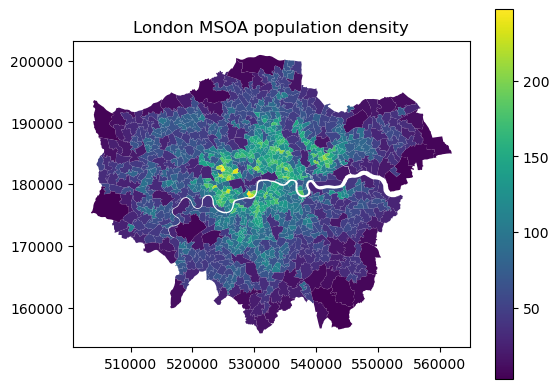

In [48]:
gdfs['MSOA'].plot('population_density', legend=True)
_ = plt.title("London MSOA population density")